In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from os import listdir
from os.path import isfile, join


sns.set(rc={'figure.figsize':(15,8.27)})
sns.set(style="whitegrid")

In [3]:
example_file_path = '/Users/attilanagy/Personal/hu-nmt/data/ftp.mokk.bme.hu/Hunglish2/classic.lit/bi/Andersen_1.bi'
base_data_dir = '/Users/attilanagy/Personal/hu-nmt/data/ftp.mokk.bme.hu/Hunglish2'
domains = [
    'classic.lit',
    'law',
    'modern.lit',
    'softwaredocs',
    'subtitles'
]

In [19]:
def dump_domain_content_to_file(sentences, domain):
    with open(f'{domain}.txt', 'w+') as f:
        for sentence_pair in sentences:
            f.write('\t'.join(sentence_pair)+'\n')

In [4]:
# for domain in domains:
domain = domains[0]
lines = []
sentence_pairs = []
malformed_lines = []
domain_path = f'{base_data_dir}/{domain}/bi'
files = [f for f in listdir(f'{domain_path}') if isfile(join(f'{domain_path}', f))]
for file in files:
    with open(f'{domain_path}/{file}', 'r', encoding='latin2') as f:
        for line in f:
            try:
                hun_eng_sentence_pair = line.strip().split('\t')
                if len(hun_eng_sentence_pair) != 2:
                    raise ValueError(f'Hun-eng sentence pair {hun_eng_sentence_pair} has bad formatting')
                sentence_pairs.append(hun_eng_sentence_pair)
            except:
                malformed_lines.append((line, domain, file))

In [20]:
# use this to concat separate files to a single domain-specific file
dump_domain_content_to_file(sentence_pairs, domain)

In [5]:
malformed_lines

[('\t\n', 'classic.lit', 'Bible_2.bi'),
 ('\t\n', 'classic.lit', 'Shakespeare_14.bi'),
 ('\t\n', 'classic.lit', 'Shakespeare_8.bi'),
 ('\t\n', 'classic.lit', 'Stevenson_2.bi'),
 ('15.\t\n', 'classic.lit', 'Stevenson_2.bi'),
 ('25.\t\n', 'classic.lit', 'Stevenson_2.bi'),
 ('28.\t\n', 'classic.lit', 'Stevenson_2.bi'),
 ('6.\t\n', 'classic.lit', 'Stevenson_2.bi'),
 ('\t\n', 'classic.lit', 'Austen_2.bi'),
 ('\t- " \n', 'classic.lit', 'Austen_2.bi'),
 ("\t'Ah!\n", 'classic.lit', 'Dickens_2.bi'),
 ("\t'Oh!\n", 'classic.lit', 'Dickens_2.bi'),
 ('\t\n', 'classic.lit', 'Racine_1.bi'),
 ('\t\n', 'classic.lit', 'Shakespeare_10.bi'),
 ('\tDuk.\n', 'classic.lit', 'Shakespeare_10.bi'),
 ('\tEsc.\n', 'classic.lit', 'Shakespeare_10.bi'),
 ('\tNo \n', 'classic.lit', 'Shakespeare_10.bi'),
 ('\tPro.\n', 'classic.lit', 'Shakespeare_10.bi'),
 ('\t\n', 'classic.lit', 'Scott_1.bi'),
 ('--- \t\n', 'classic.lit', 'Shuffle'),
 ('. \t\n', 'classic.lit', 'Shuffle'),
 ('(?)!\t\n', 'classic.lit', 'Shuffle'),
 ('* \

In [16]:
sentence_pairs[0:3]

['A 11. esztendőben, a hónap elsején az Úr szózatot intézett hozzám: "Emberfia, Tírusz így nevetett Jeruzsálemen: Összetört a népek kapuja és felém fordult.',
 'And it came to pass in the eleventh year, the first day of the month, that the word of the Lord came to me, saying:']

In [7]:
df = pd.DataFrame(sentence_pairs, columns=['hun', 'eng'])

In [8]:
df

,hun,eng
0,"A 11. esztendőben, a hónap elsején az Úr szóza...","And it came to pass in the eleventh year, the ..."
1,"A 11. esztendőben, az első hónapban, a hó hete...","And it came to pass in the eleventh year, in t..."
2,A 145. esztendő Kiszleu hónapjának tizenötödik...,"On the fifteenth day of the month, Casleu, in ..."
3,A 148. esztendőben a kilencedik hónap - azaz a...,And they arose before the morning on the five ...
4,"A 151. esztendőben Szeleukusz fia, Demetriusz ...","In the hundred and fifty-first year, Demetrius..."
...,...,...
651280,Zihált az aggodalomtól és a gyors futástól.,Anxiety and his swift run made him pant.
651281,"Zokogás fojtogatta, érzelmei annyira erőt vett...","She stopped, choking with sobs, and, overcome ..."
651282,Zokogva kulcsolta karjait a férfi nyaka köré.,"She cried and threw her arms round his neck, s..."
651283,Zongora is volt a kabinban.,There was a yacht piano in the cabin.


In [9]:
df['hun_len_word'] = df['hun'].apply(lambda x: len(x.split()))
df['eng_len_word'] = df['eng'].apply(lambda x: len(x.split()))
df['hun_len_char'] = df['hun'].apply(lambda x: len(x))
df['eng_len_char'] = df['eng'].apply(lambda x: len(x))


In [10]:
df

,hun,eng,hun_len_word,eng_len_word,hun_len_char,eng_len_char
0,"A 11. esztendőben, a hónap elsején az Úr szóza...","And it came to pass in the eleventh year, the ...",23,25,154,115
1,"A 11. esztendőben, az első hónapban, a hó hete...","And it came to pass in the eleventh year, in t...",25,29,157,138
2,A 145. esztendő Kiszleu hónapjának tizenötödik...,"On the fifteenth day of the month, Casleu, in ...",21,40,165,227
3,A 148. esztendőben a kilencedik hónap - azaz a...,And they arose before the morning on the five ...,28,28,187,152
4,"A 151. esztendőben Szeleukusz fia, Demetriusz ...","In the hundred and fifty-first year, Demetrius...",19,33,147,174
...,...,...,...,...,...,...
651280,Zihált az aggodalomtól és a gyors futástól.,Anxiety and his swift run made him pant.,7,8,43,40
651281,"Zokogás fojtogatta, érzelmei annyira erőt vett...","She stopped, choking with sobs, and, overcome ...",19,20,132,119
651282,Zokogva kulcsolta karjait a férfi nyaka köré.,"She cried and threw her arms round his neck, s...",7,10,45,52
651283,Zongora is volt a kabinban.,There was a yacht piano in the cabin.,5,8,27,37


In [11]:
def get_len_metrics(df):
    metrics = {}
    for language in ['hun', 'eng']:
        metrics[language] = {}
        for mode in ['word', 'char']:
            metrics[language][mode] = {}
            col = f'{language}_len_{mode}'
            metrics[language][mode]['q0.25'] = str(df[col].quantile(q=0.25))
            metrics[language][mode]['q0.5'] = str(df[col].quantile(q=0.5))
            metrics[language][mode]['q0.75'] = str(df[col].quantile(q=0.75))
            metrics[language][mode]['q0.99'] = str(df[col].quantile(q=0.99))
            metrics[language][mode]['q0.999'] = str(df[col].quantile(q=0.999))
            metrics[language][mode]['min'] = str(df[col].min())
            metrics[language][mode]['max'] = str(df[col].max())
            metrics[language][mode]['mean'] = str(df[col].mean())
            metrics[language][mode]['stdev'] = str(df[col].std())

    return metrics

In [12]:
len_metrics = get_len_metrics(df)
print(json.dumps(len_metrics, sort_keys=True, indent=4))

{
    "eng": {
        "char": {
            "max": "3997",
            "mean": "79.70948202399872",
            "min": "1",
            "q0.25": "33.0",
            "q0.5": "61.0",
            "q0.75": "106.0",
            "q0.99": "324.0",
            "q0.999": "556.0",
            "stdev": "68.60356100998378"
        },
        "word": {
            "max": "663",
            "mean": "14.582600551217977",
            "min": "1",
            "q0.25": "6.0",
            "q0.5": "11.0",
            "q0.75": "19.0",
            "q0.99": "58.0",
            "q0.999": "99.0",
            "stdev": "12.371398869391316"
        }
    },
    "hun": {
        "char": {
            "max": "3997",
            "mean": "79.4386313211574",
            "min": "2",
            "q0.25": "33.0",
            "q0.5": "61.0",
            "q0.75": "105.0",
            "q0.99": "324.0",
            "q0.999": "555.0",
            "stdev": "68.19203737353502"
        },
        "word": {
            "max": "59

## Sample sentence length distribution - word and character level

[Text(0.5, 0, 'ENG - Sentence length (char)'), Text(0, 0.5, 'Frequency')]

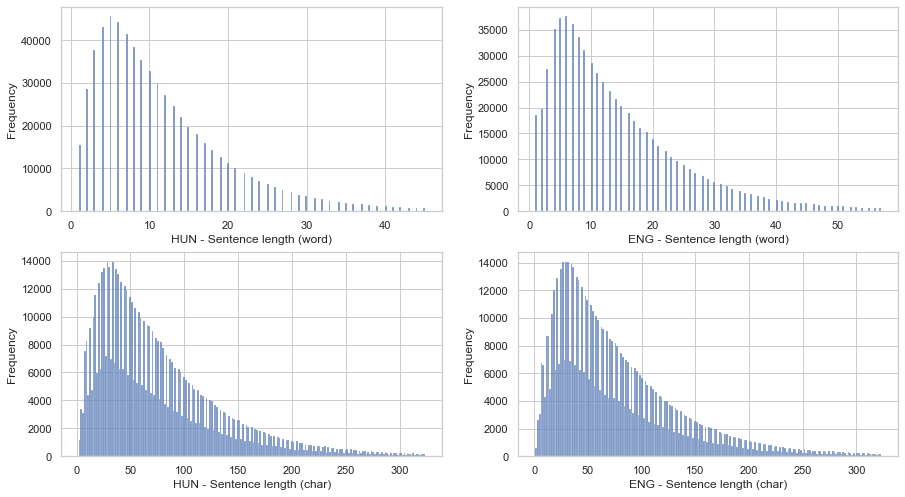

In [15]:
fig, axs = plt.subplots(2,2)

sns.histplot(df[df['hun_len_word'] < int(float(len_metrics['hun']['word']['q0.99']))]['hun_len_word'], ax=axs[0, 0])
axs[0, 0].set(xlabel='HUN - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['eng_len_word'] < int(float(len_metrics['eng']['word']['q0.99']))]['eng_len_word'], ax=axs[0, 1])
axs[0, 1].set(xlabel='ENG - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['hun_len_char'] < int(float(len_metrics['hun']['char']['q0.99']))]['hun_len_char'], ax=axs[1, 0])
axs[1, 0].set(xlabel='HUN - Sentence length (char)', ylabel='Frequency')

sns.histplot(df[df['eng_len_char'] < int(float(len_metrics['eng']['char']['q0.99']))]['eng_len_char'], ax=axs[1, 1])
axs[1, 1].set(xlabel='ENG - Sentence length (char)', ylabel='Frequency')


